# INAUGURAL PROJECT : IMPROVED

**Table of contents**<a id='toc0_'></a>    
- [Imports](#toc1_)    
- [Model class](#toc2_)    
- [Question 1 : Edgeworth Box and Pareto Improvements](#toc3_)
- [Question 2 : Error Market Clearing](#toc4_)  
- [Question 3 : Market Clearing Price](#toc5_)
- [Question 4.a : Optimal Allocation if Prices are in P1 and A Optimizes own Utility](#toc6_)
- [Question 4.b : Optimal Allocation if Prices are Positive and A Optimizes own Utility](#toc7_)
- [Question 5.a : Optimal Allocation if A is the Market Maker and the Choice Set is Restricted](#toc8_)
- [Question 5.b : Optimal Allocation if A is the Market Maker and the Choice Set is Not Restricted](#toc9_)
- [Question 6.a : Optimal Allocation if Utilitarian Social Planner is the Market Maker](#toc10_)
- [Question 6.b : Illustration and Comparison of results in question 3, 5.a, 5.b and 6.a ](#toc11_)
- [Question 7 : Draw a Random Set](#toc12_)
- [Question 8 : Find Market Equilibrium Allocation and Illustrate them](#toc13_)
<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_'></a>[Imports](#toc0_)

In [75]:
import matplotlib.pyplot as plt
import numpy as np 
from scipy import optimize 

plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## <a id='toc2_'></a>[Model class](#toc0_)

In [76]:
from ExchangeEconomy import ExchangeEconomyClass

In [77]:
model = ExchangeEconomyClass()
par = model.par


## <a id='toc3_'></a>[Question 1 : Edgeworth Box and Pareto Improvements](#toc0_)

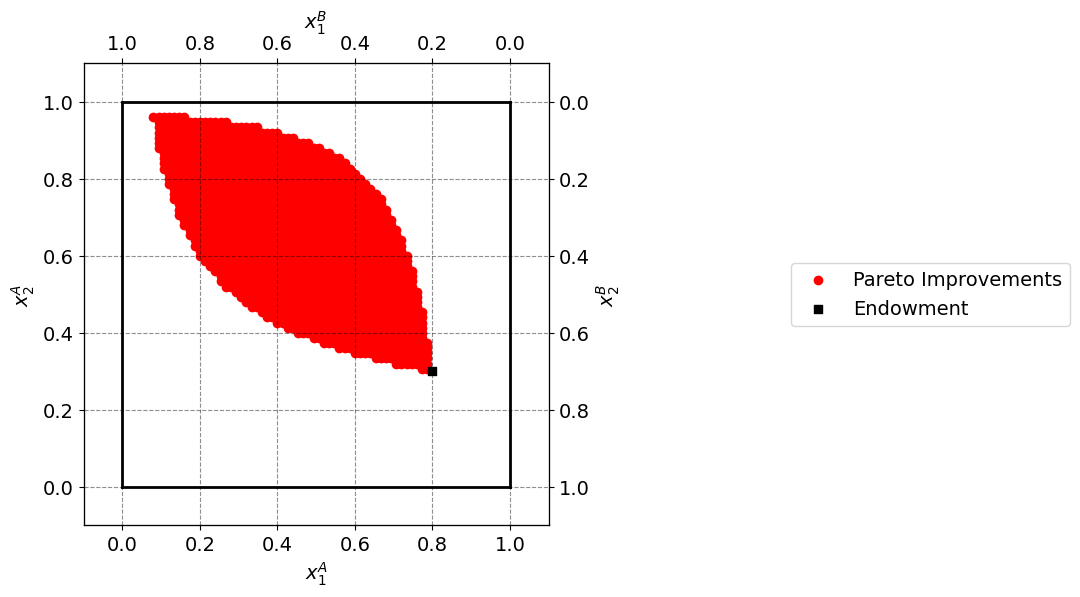

In [78]:
# 1. Looping over each possible value of x1A and x2A to compute all Pareto improvements :
N = 75 
pareto_improvements = []
for x1A in np.linspace(0, 1, N+1):
    for x2A in np.linspace(0, 1, N+1):
        if model.is_pareto(x1A, x2A):
                pareto_improvements.append((x1A, x2A))


# 2. Code to create the Edgeworth box :

# a. total endowment :
w1bar = 1.0
w2bar = 1.0

# b. figure set up :
fig = plt.figure(frameon=True,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# c. limits :
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

# d. implementing pareto improvements :
pareto_improvements = np.array(pareto_improvements)
ax_A.scatter(pareto_improvements[:, 0], pareto_improvements[:, 1], color='red', label='Pareto Improvements')
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='Endowment')

# e. for the legend to show : 
ax_A.legend(loc='center left', bbox_to_anchor=(1.5, 0.5));


## <a id='toc4_'></a>[Question 2 : Error Market Clearing](#toc0_)

In [79]:
# 1. Creating P1 : 
N = 75  
P1 = [] 
for i in range(N + 1):
    P1.append( 0.5 + i * (2 / N))
P1 = np.round(P1,3)

# 2. Looping through each value of p1 to compute errors in market clearing :
for p1 in P1:
        eps1, eps2 = model.check_market_clearing(p1)
        print(f"For p1 = {p1:.2f}:")
        print(f"   Error in market clearing condition 1: {eps1:.2f}")
        print(f"   Error in market clearing condition 2: {eps2:.2f}")


For p1 = 0.50:
   Error in market clearing condition 1: 0.53
   Error in market clearing condition 2: -0.27
For p1 = 0.53:
   Error in market clearing condition 1: 0.48
   Error in market clearing condition 2: -0.25
For p1 = 0.55:
   Error in market clearing condition 1: 0.42
   Error in market clearing condition 2: -0.23
For p1 = 0.58:
   Error in market clearing condition 1: 0.38
   Error in market clearing condition 2: -0.22
For p1 = 0.61:
   Error in market clearing condition 1: 0.33
   Error in market clearing condition 2: -0.20
For p1 = 0.63:
   Error in market clearing condition 1: 0.30
   Error in market clearing condition 2: -0.19
For p1 = 0.66:
   Error in market clearing condition 1: 0.26
   Error in market clearing condition 2: -0.17
For p1 = 0.69:
   Error in market clearing condition 1: 0.22
   Error in market clearing condition 2: -0.15
For p1 = 0.71:
   Error in market clearing condition 1: 0.19
   Error in market clearing condition 2: -0.14
For p1 = 0.74:
   Error in m

## <a id='toc5_'></a>[Question 3 : Market Clearing Price](#toc0_)

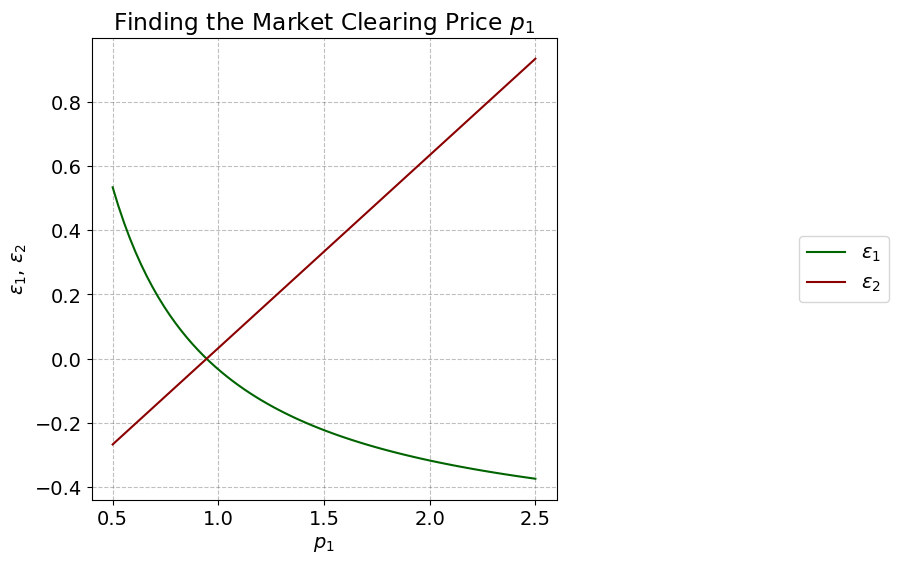

In [80]:
# 1. Set up : 
N  = 75
P1 = np.linspace(0.5, 2.5, N)

# 2. Calculate market clearing errors for each p1 in P1 :
epsilon_1 = []
epsilon_2 = []
for p1 in P1:
    eps1, eps2 = model.check_market_clearing(p1)
    epsilon_1.append(eps1)
    epsilon_2.append(eps2)

# 3. Plotting : 
plt.figure(figsize=(6, 6))
plt.plot(P1, epsilon_1, label='$\\epsilon_1$', color='darkgreen')
plt.plot(P1, epsilon_2, label='$\\epsilon_2$', color='darkred')
plt.title('Finding the Market Clearing Price $p_1$')
plt.xlabel('$p_1$')
plt.ylabel('$\\epsilon_1$, $\\epsilon_2$')
plt.legend(loc='center left', bbox_to_anchor=(1.5, 0.5));
plt.show();


In [81]:
# Call the model that find the price where both epsilons are close to zero which corresponds to the clearing market price :  
model.solve_3()

Minimum combined error: 0.00000 at price: 0.94400
Epsilon1: 0.00028, Epsilon2: -0.00027


{'Optimal Price for Consumer A': '0.94400'}

## <a id='toc6_'></a>[Question 4.a : Optimal Allocation if Prices are in P1 and A Optimizes own Utility](#toc0_)

In [82]:
# 1. Define parameters that will be updated while looping :
negative_utility = -np.inf
value = []
x1_0 = np.nan
x2_0 = np.nan
p_solution = np.nan

# 2. Same parameters as before : 
N = 75  
P1 = []
for i in range(N + 1):
    P1.append( 0.5 + i * (2 / N))
P1 = np.round(P1,3)

# 3. Looping through P1 to find optimal values : 
for p1 in P1: 
    x1B, x2B = model.demand_B(p1) 
    x1A = 1 - x1B 
    x2A = 1 - x2B
    utility_A_now = model.utility_A(1-x1B, 1-x2B)
    if utility_A_now > negative_utility: 
        negative_utility = utility_A_now
        x1_0 = x1A
        x2_0 = x2A
        p_solution = p1

# 4. Unpacking the solution for A's demand at the optimal price :
x1A_optimalprice, x2A_optimalprice= model.demand_A(p_solution)

# 5. Prinitng solution : 
print(f"Maximum Utility for A: {negative_utility:.2f}")
print(f"Optimal x1 for A: {x1_0:.2f}")
print(f"Optimal x2 for A: {x2_0:.2f}")
print(f"Optimal x2 for A: {p_solution:.2f}")
print(f"Demand for A at optimal price: ({x1A_optimalprice:.2f},{x2A_optimalprice:.2f})")

Maximum Utility for A: 0.63
Optimal x1 for A: 0.62
Optimal x2 for A: 0.64
Optimal x2 for A: 1.89
Demand for A at optimal price: (0.32,1.21)


/Users/boisserielouise/Desktop/Magistère 2ème année/S2/Intro to Programming/Projects/Inaugural Project/LE VRAI DE VRAI/ExchangeEconomy.py:21: RuntimeWarning: invalid value encountered in scalar power
  return x1A**(self.par.alpha)*x2A**(1-self.par.alpha)


## <a id='toc7_'></a>[Question 4.b : Optimal Allocation if Prices are Positive and A Optimizes own Utility](#toc0_)

In [83]:
# 1. Constraints :
def constraint_p(p):
    return p 
constraints ={'type': 'ineq', 'fun': constraint_p} 
bounds = [(0,None)] 

# 2. Call solver :
initial_guess = 1
sol_case2 = optimize.minimize(model.negative_utility_A, initial_guess, bounds = bounds,method='SLSQP',constraints= constraints)

# 3. Unpacking solutions : 
p_optimum = sol_case2.x
x1_sol_4b = 1-model.demand_B(p_optimum)[0]
x2_sol_4b = 1-model.demand_B(p_optimum)[1]
u_sol_4b =-model.negative_utility_A(p_optimum)

# 4. Print solution : 
print(f"Optimal price, {p_optimum}") 
print(f"Optimal amount of good 1 for person A, {x1_sol_4b}")
print(f"Optimal amount of good 2 for person A,{x2_sol_4b}")
print(f"Utility for person A in optimum, {u_sol_4b}")

Optimal price, [1.89678021]
Optimal amount of good 1 for person A, [0.6206357]
Optimal amount of good 2 for person A,[0.64021465]
Utility for person A in optimum, [0.63362065]


## <a id='toc8_'></a>[Question 5.a : Optimal Allocation if A is the Market Maker and the Choice Set is Restricted](#toc0_)

In [84]:
# 1. Values that will be updated for the loop : 
utility_start = -50
x1_start = 0
x2_start = 0
x_start = [0,0]

# 2. Solving the model :  
for x in pareto_improvements: 
    if model.utility_A(x[0],x[1]) > utility_start: 
        utility_start = model.utility_A(x_start[0], x_start[1])
        x_start[0] = x[0]
        x_start[1] = x[1]

# 3. Printing solution :  
print("Optimal Allocation for person A:", x_start) 
print("Utility for person A when having optimal allocation:", model.utility_A(x_start[0], x_start[1])) 

Optimal Allocation for person A: [0.5733333333333334, 0.8400000000000001]
Utility for person A when having optimal allocation: 0.7395858408079152


## <a id='toc9_'></a>[Question 5.b : Optimal Allocation if A is the Market Maker and the Choice Set is Not Restricted](#toc0_)

In [85]:
# 1. Set up constraints so that consumer B is as well off as with his endowment : 
constraints = ({'type': 'ineq', 'fun': lambda x: model.utility_B(1 - x[0], 1 - x[1]) - model.utility_B(1-model.par.w1A, 1-model.par.w2A)})
bounds = ((0, 1), (0, 1)) 

# 2. Call solver :
initial_guess = [model.par.w1A, model.par.w2A]
sol_case2 = optimize.minimize(model.negative_utility_A_5b, initial_guess,method='SLSQP', bounds=bounds, constraints=constraints)

# 3. Unpacking solutions :
x1_optimal_5b = sol_case2.x[0]
x2_optimal_5b = sol_case2.x[1]

# 4. Printing : 
print("Optimal amount of good 1 for person A:",sol_case2.x[0]) 
print("Optimal amount of good 2 for person A:",sol_case2.x[1])
print("Maximized utility for person A:", model.utility_A(x1_optimal_5b, x2_optimal_5b))

Optimal amount of good 1 for person A: 0.5757450601538892
Optimal amount of good 2 for person A: 0.8444377859258702
Maximized utility for person A: 0.7432276287154398


## <a id='toc10_'></a>[Question 6.a :Optimal Allocation if Utilitarian Social Planner is the Market Maker](#toc0_)

In [86]:
# 1. Define the constraints for xA1 and xA2 : 
constraints = ({'type': 'ineq', 'fun': lambda x: x[0]},
               {'type': 'ineq', 'fun': lambda x: x[1]},
               {'type': 'ineq', 'fun': lambda x: 1 - x[0]},
               {'type': 'ineq', 'fun': lambda x: 1 - x[1]})

# 2. Bounds for solutions :
bounds = ((0, 1), (0, 1)) ## both can only be between 0 and 1 

# 3. Call the solver : 
initial_guess = [0.5, 0.5]
sol = optimize.minimize(model.aggregate_utility, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)

# 4. Unpacking solutions :
xA1_optimal = sol.x[0]
xA2_optimal = sol.x[1]
utility_A = model.utility_A(xA1_optimal, xA2_optimal)
utility_B = model.utility_B(1 - xA1_optimal, 1 - xA2_optimal)

# 5. Printing the solutions :
print("Optimal Allocation:")
print("xA1:", xA1_optimal)
print("xA2:", xA2_optimal)
print("xB1:", 1-xA1_optimal)
print("xB2:", 1-xA2_optimal)
print("Utility for A:", utility_A)
print("Utility for B:", utility_B)

Optimal Allocation:
xA1: 0.33341166147388446
xA2: 0.6665883190561481
xB1: 0.6665883385261155
xB2: 0.3334116809438519
Utility for A: 0.5291336663821624
Utility for B: 0.5291336869853834


## <a id='toc10_'></a>[Question 6.b : Illustration and Comparison of results in question 3, 4.a, 4.b, 5.a, 5.b and 6.a](#toc0_)

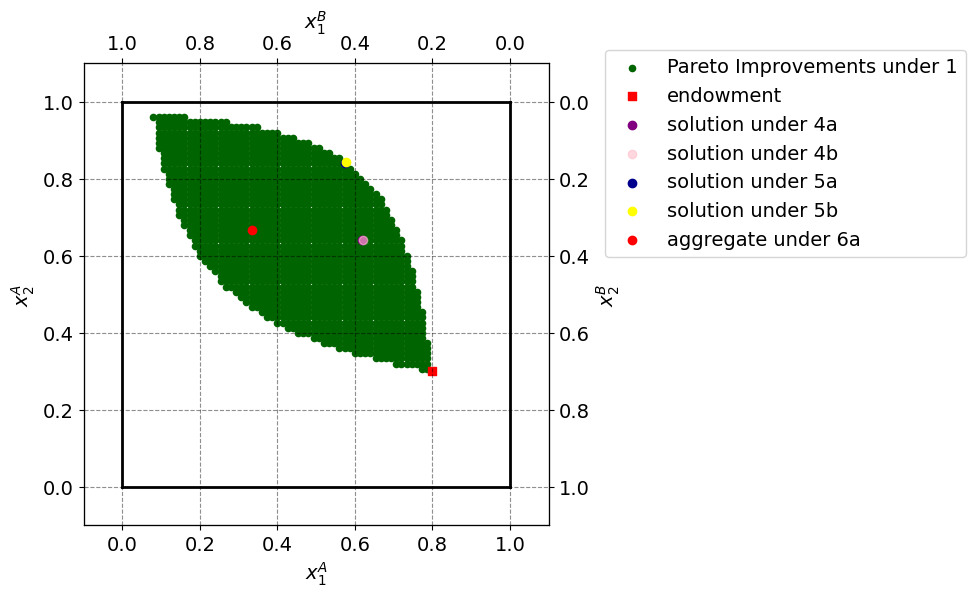

In [87]:
# 1. Figure set up :
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# 2. Limits :
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

# 3. Plotting results : 
pareto_improvements = np.array(pareto_improvements)
ax_A.scatter(pareto_improvements[:, 0], pareto_improvements[:, 1], color='darkgreen', label='Pareto Improvements under 1', s=20)
ax_A.scatter(par.w1A,par.w2A,marker='s',color='red',label='endowment')

## plotting 4a 
ax_A.scatter(x1_0, x2_0, marker = 'o', color = "purple", label = "solution under 4a")

## plotting 4b 
ax_A.scatter(x1_sol_4b, x2_sol_4b, marker = 'o', color = "pink", alpha = 0.6, label = "solution under 4b")

## plotting 5a 
ax_A.scatter(x_start[0], x_start[1], marker = 'o', color = "darkblue", label = "solution under 5a")

## plotting 5b 
ax_A.scatter(x1_optimal_5b, x2_optimal_5b, marker = 'o', color = "yellow", label = "solution under 5b")

## plotting 6a
ax_A.scatter(xA1_optimal, xA2_optimal,marker='o',color='red',label='aggregate under 6a')

## add legend with pareto improvments, initial endowments and all solutions of the previous tasks 
ax_A.legend(bbox_to_anchor=(1.1, 1.05));

## <a id='toc11_'></a>[Question 7 : Random Set Draw](#toc0_)

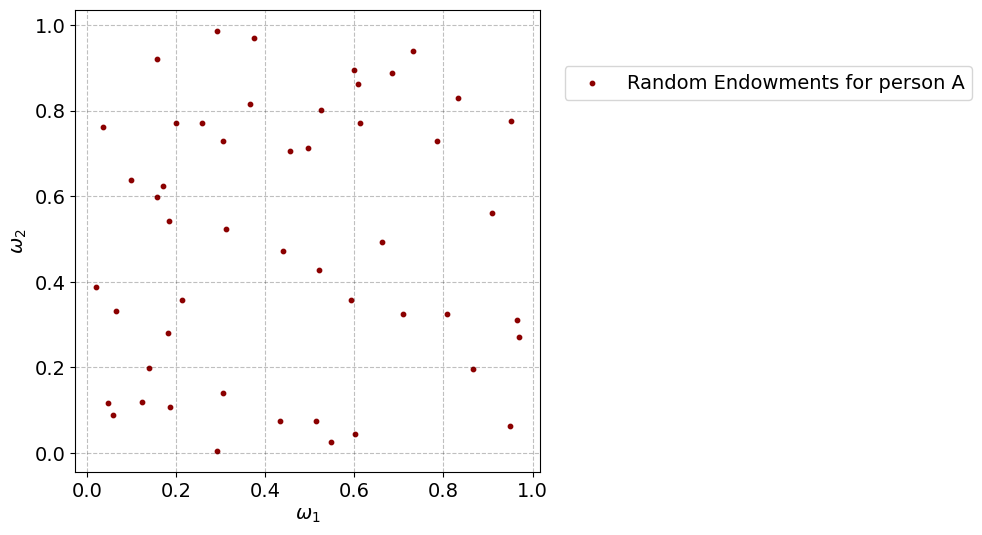

In [88]:
# 1. Set the seed for reproducibility :
np.random.seed(42)

# 2. Generate the set W with 50 elements :
# produces a 2-dimensional array with 50 rows and 1 column by using random.rand()
omega_1 = np.random.rand(50,1)
omega_2 = np.random.rand(50,1)


# 3. Plotting setup :
fig = plt.figure(frameon= True, figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

## axis labels and inverted axes for B
ax_A.set_xlabel("$\\omega_1$")
ax_A.set_ylabel("$\\omega_2$")
ax_A.scatter(omega_1, omega_2, color='darkred', label='Random Endowments for person A', s=10)

## add legend
ax_A.legend(bbox_to_anchor=(1.95, 0.9));

## <a id='toc13_'></a>[Question 8 : Find Market Equilibrium Allocation and Illustrate them](#toc0_)

In [89]:
# Necessary to change format of omega_1 & omega_2 : to run optimize.minimize in task 8 

print(type(omega_1)) 
omega_1_list = np.ndarray.tolist(omega_1)
print(type(omega_1_list)) ## now a list 

type(omega_2)
omega_2_list = np.ndarray.tolist(omega_2)
type(omega_2_list)

<class 'numpy.ndarray'>
<class 'list'>


list

In [90]:
# 1. defining constraints for both consumers : 
con1 = ({'type': 'ineq', 'fun': lambda x: model.utility_B(1 - x[0], 1 - x[1]) - model.utility_B(1-w1A, 1-w2A)})
con2 = ({'type': 'ineq', 'fun': lambda x: model.utility_A(x[0], x[1]) - model.utility_A(w1A, w2A)})
cons = [con1,con2]
bounds = ((0, 1), (0, 1)) ## boundaries for solution (needs to be between 0 and 1)
market_equilibrium = [] ## will be filled during the for-loop 


# 2. Use solver to find market equilibria for each pair of random endowment :
for w1A_list, w2A_list in zip(omega_1_list, omega_2_list):
    for w1A, w2A in zip(w1A_list, w2A_list):
    # Define constraints inside the loop with specific values of w1A and w2A
        x0 = [w1A, w2A]
        sol = optimize.minimize(model.aggregate_utility, x0, method="SLSQP", bounds=bounds, constraints=cons)
        market_equilibrium.append(sol.x)


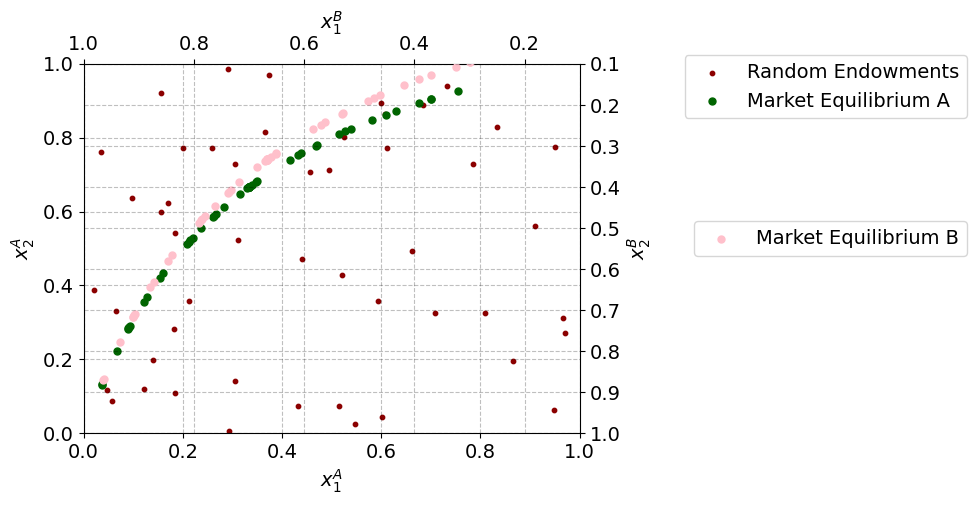

In [91]:
# 1. Set up figure :
fig=plt.figure()
ax=fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2", frame_on=False)

# 2. Plotting market equilibrium :
market_equilibrium_A = np.array(market_equilibrium)
ax.scatter(omega_1, omega_2, color='darkred', label='Random Endowments', s=10)
ax.scatter(market_equilibrium_A[:, 0], market_equilibrium_A[:, 1], color='darkgreen', label='Market Equilibrium A', s=25)
ax.set_xlabel("$x_1^A$")
ax.set_ylabel("$x_2^A$")
ax.tick_params(axis='x')
ax.tick_params(axis='y')
ax.set_xlim([0,1]) ## talk about this! 
ax.set_ylim([0,1])    
ax2.set_xlim([1, 0.1])
ax2.set_ylim([1,0.1])

# 3. Setting the other axes :
ax2.scatter(1-market_equilibrium_A[:, 0],1-market_equilibrium_A[:, 1], color='pink', label='Market Equilibrium B', s=25)
ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
ax2.set_xlabel("$x_1^B$")
ax2.set_ylabel("$x_2^B$")    
ax2.xaxis.set_label_position('top') 
ax2.yaxis.set_label_position('right') 
ax2.tick_params(axis='x')
ax2.tick_params(axis='y')

# 4. For the legend to show : 
ax.legend(bbox_to_anchor=(1.8, 1.05));
ax2.legend(bbox_to_anchor=(1.8, 0.60));